In [4]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

In [5]:
train_data=data[:1000]
train_target=target[:1000]

test_data=data[1000:]
test_target=target[1000:]

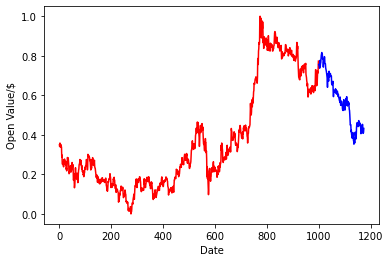

In [6]:
from matplotlib import pyplot as plt

test_x_range=np.arange(1000,1175,1)

plt.plot(train_target,'r',label='train')
plt.plot(test_x_range,test_target,'b',label='test')
plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.show()

In [7]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout

model=Sequential()

model.add(LSTM(units=100,return_sequences=True,input_shape=(data.shape[1:])))
model.add(Dropout(0.2))

model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100,return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation='linear'))

model.compile(loss='mse',optimizer='adam')

C:\Users\proto\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [8]:
history=model.fit(train_data,train_target,epochs=200,validation_split=0.1)

Epoch 1/200
29/29 [==============================] - 8s 44ms/step - loss: 0.0195 - val_loss: 0.0045
Epoch 2/200
29/29 [==============================] - 1s 18ms/step - loss: 0.0043 - val_loss: 0.0210
Epoch 3/200
29/29 [==============================] - 0s 16ms/step - loss: 0.0054 - val_loss: 0.0046
Epoch 4/200
29/29 [==============================] - 0s 17ms/step - loss: 0.0060 - val_loss: 0.0027
Epoch 5/200
29/29 [==============================] - 0s 16ms/step - loss: 0.0047 - val_loss: 0.0067
Epoch 6/200
29/29 [==============================] - 1s 18ms/step - loss: 0.0038 - val_loss: 0.0026
Epoch 7/200
29/29 [==============================] - 0s 17ms/step - loss: 0.0032 - val_loss: 0.0053
Epoch 8/200
29/29 [==============================] - 1s 18ms/step - loss: 0.0033 - val_loss: 0.0037
Epoch 9/200
29/29 [==============================] - 0s 16ms/step - loss: 0.0036 - val_loss: 0.0050
Epoch 10/200
29/29 [==============================] - 0s 17ms/step - loss: 0.0032 - val_loss: 0.0024

Epoch 82/200
29/29 [==============================] - 1s 19ms/step - loss: 0.0012 - val_loss: 8.1033e-04
Epoch 83/200
29/29 [==============================] - 1s 18ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 84/200
29/29 [==============================] - 0s 14ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 85/200
29/29 [==============================] - 0s 15ms/step - loss: 0.0011 - val_loss: 0.0026
Epoch 86/200
29/29 [==============================] - 0s 15ms/step - loss: 0.0011 - val_loss: 9.4393e-04
Epoch 87/200
29/29 [==============================] - 0s 15ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 88/200
29/29 [==============================] - 0s 15ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 89/200
29/29 [==============================] - 0s 15ms/step - loss: 0.0011 - val_loss: 7.5455e-04
Epoch 90/200
29/29 [==============================] - 0s 14ms/step - loss: 0.0011 - val_loss: 0.0033
Epoch 91/200
29/29 [==============================] - 0s 14ms/step - loss: 0.00

29/29 [==============================] - 0s 17ms/step - loss: 9.1439e-04 - val_loss: 0.0045
Epoch 161/200
29/29 [==============================] - 1s 18ms/step - loss: 8.3512e-04 - val_loss: 9.0788e-04
Epoch 162/200
29/29 [==============================] - 1s 17ms/step - loss: 8.5541e-04 - val_loss: 7.0864e-04
Epoch 163/200
29/29 [==============================] - 1s 18ms/step - loss: 0.0010 - val_loss: 0.0013
Epoch 164/200
29/29 [==============================] - 1s 17ms/step - loss: 9.1406e-04 - val_loss: 0.0012
Epoch 165/200
29/29 [==============================] - 0s 17ms/step - loss: 0.0011 - val_loss: 0.0014
Epoch 166/200
29/29 [==============================] - 1s 18ms/step - loss: 7.9921e-04 - val_loss: 0.0026
Epoch 167/200
29/29 [==============================] - 1s 18ms/step - loss: 8.9009e-04 - val_loss: 0.0018
Epoch 168/200
29/29 [==============================] - 0s 17ms/step - loss: 9.0439e-04 - val_loss: 0.0017
Epoch 169/200
29/29 [==============================] - 1s 18

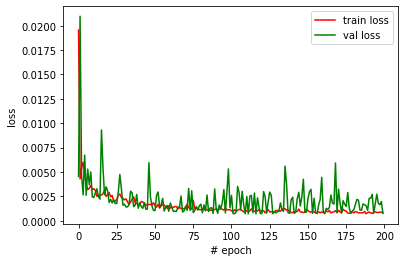

In [10]:
plt.plot(history.history['loss'],'r',label='train loss')
plt.plot(history.history['val_loss'],'g',label='val loss')
plt.xlabel('# epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [11]:
result=model.predict(test_data)

from sklearn.metrics import r2_score

r2=r2_score(test_target,result)
print('r2 score:',r2)

6/6 [==============================] - 1s 6ms/step
r2 score: 0.9757639495724526


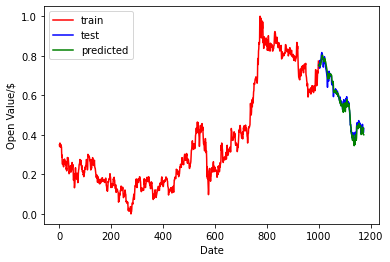

In [12]:
test_x_range=np.arange(1000,1175,1)
#test_x_range is an array of values between 1000-1208

plt.plot(train_target,'r',label='train')
plt.plot(test_x_range,test_target,'b',label='test')
plt.plot(test_x_range,result,'g',label='predicted')

plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.legend()
plt.show()

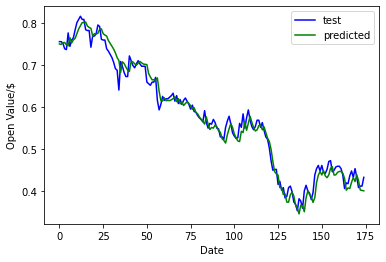

In [13]:
plt.plot(test_target,'b',label='test')
plt.plot(result,'g',label='predicted')

plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.legend()
plt.show()